<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction - Classification**

[Dataset Used](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

# 1. Business Understanding

**What is churn?**

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.

--

We need to predict if a customer in a Telecom company if they will churn or not, so that we will be able to retain that customer by offering discounts.

# 2. Imports


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from IPython.display import display

# Mutual information
from sklearn.metrics import mutual_info_score 
# One-hot encoding
from sklearn.feature_extraction import DictVectorizer
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# 3. Data Preparation

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
!wget $data -O data-week-3.csv

--2022-10-05 17:27:04--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2022-10-05 17:27:04 (19.8 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Transpose df to view all column
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Change column names and values to make them consistent

In [ ]:
# Column names to lowercase and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Categorical column values to lowercase and replace space with underscore
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Change column types to the right one

In [ ]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

### totalcharges

In [ ]:
# Total charges to numeric
# it will give an error since the original df had some empty values that
# changed to underscore when we swapped all spaces with underscores

# to ignore such error and replace non-numerics with NaNs, 
#use the `errors` parameter
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# fill NaNs with 0s
df.totalcharges = df.totalcharges.fillna(0)

### churn

In [ ]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [ ]:
# yes -> true -> 1
# no -> false -> 0
# replace yes with 1 and no with 0

df.churn = (df.churn=='yes').astype(int)

# 4. Setting up the validation framework
perform the train/validation/test split with Scikit-Learn

## Split df into train/val/test

In [ ]:
# 80% -> df_full_train, 20% -> df_test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# 60% of 80% -> train, 20% of 80% (25%) -> val
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
# reset indicies
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Get the target variables

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# delete target variable from features dataframe
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 5. EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [ ]:
# We will use full train df with the target variable for EDA
df_full_train = df_full_train.reset_index(drop=True)

## 5.1. Check missing values

In [ ]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There are no missing variables

## 5.2. Look at the target variable (churn)

In [ ]:
# Percentage of target values
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

> 0.269968 is the **churn rate**

- 27% are churning users
- 73% are not churning users

In [ ]:
# We can also find the churn rate using the mean
# since churn = 1
# global churn rate is the churn rate in the entire dataset
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

27% of the users are churning

## 5.3. Look at numerical and categorical variables

In [ ]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

**Numerical variables:**
- tenure
- monthlycharges
- totalcharges

The rest are categorical

In [ ]:
numerical = ['tenure',
             'monthlycharges',
             'totalcharges']

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'] 

In [ ]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

We can see some are binary and some have more than 2

# 6. Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

### **Feature Importance Metrics**
1. **Difference**

Global - Group

- diff<0 : More likely to churn
- diff>0 : Less likely to churn

3. **Risk Ratio**

Risk = Group/Global

- risk>1 : More likely to churn
- risk<1 : Less likely to churn

## Churn rate

### Gender

In [ ]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [ ]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

We can see that there is almost no difference between female, male, and global churn

### Partner

In [ ]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [ ]:
# Partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner 

0.20503330866025166

In [ ]:
global_churn - churn_partner 

0.06493474245795922

In [ ]:
# No Partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner 

0.3298090040927694

In [ ]:
global_churn - churn_no_partner

-0.05984095297455855

Churn rate is approx. 5% more for people without partners than global churn rate.

## Risk ratio

### Partner

In [ ]:
churn_no_partner/global_churn

1.2216593879412643

In [ ]:
churn_partner/global_churn

0.7594724924338315

For people without a partner, the churn rate is 22% higher, for people with partner the churn rate is 25% lower.

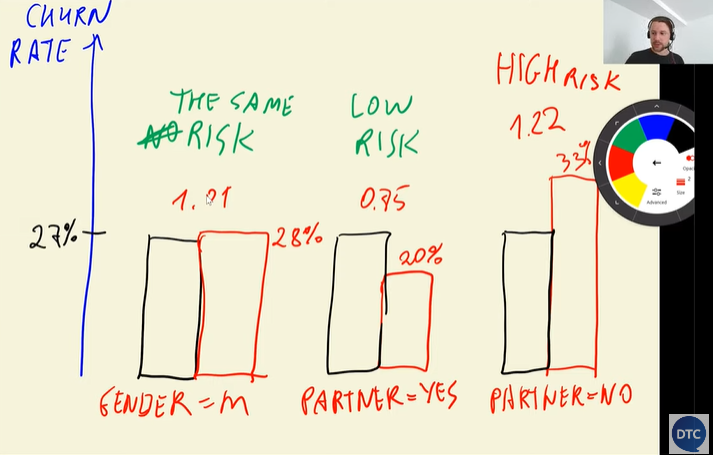

To avoid manually calculating, implement this SQL query in pandas

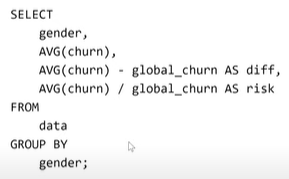


In [ ]:
for c in categorical:
  print(c)
  df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)
  print('------------------------------------------------------------------------')

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


------------------------------------------------------------------------
seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


------------------------------------------------------------------------
partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


------------------------------------------------------------------------
dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


------------------------------------------------------------------------
phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


------------------------------------------------------------------------
multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


------------------------------------------------------------------------
internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


------------------------------------------------------------------------
onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


------------------------------------------------------------------------
onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


------------------------------------------------------------------------
deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


------------------------------------------------------------------------
techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


------------------------------------------------------------------------
streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


------------------------------------------------------------------------
streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


------------------------------------------------------------------------
contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


------------------------------------------------------------------------
paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


------------------------------------------------------------------------
paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


------------------------------------------------------------------------


For example:

A customer that has no partner, no kids and has a month-to-month contract would be very likely to churn.

On the other hand, if a customer has a partner, has kids and has a 2-year contract, we would be pretty sure they are going to stay and not churn.

# 7. Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

A way to measure the importance of categorical variables.

- https://en.wikipedia.org/wiki/Mutual_information

**Example of the relationship we are interested in:**

How much do we learn about churn if we observed the value of contract?

If we know that a customer has a month-to-month contract, how much do we know about churn?

### Gender

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

We see that the value is very low, meaning that gender is not informative.

If we know that a customer is female, we learn nothing about whether they're going to churn or not.

### Contract

In [ ]:
# How much do we learn about churn by observing the contract variable
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

On the other hand, for example if we know that a person has a month-to-month contract, we learn a lot and can tell if the person has a higher risk of churning.

The information we get from learning about the contract is far more important than we get learning about gender.

## Apply metric to all categorical variables

In [ ]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

In [ ]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

This is actually the kind of signals that ML models pick when training. It learns these kinds of patterns and it's what allows the model to actually make predictions later when we don't know what the churn value is for particular customers.

# 8. Feature importance: Correlation

What about numerical columns?
### Correlation coefficient

- Way of measuring the degree of dependency between 2 variables.

- Denoted by `r`.

- It is a number between -1 and 1

  - If negative, as value of x increases, value of y decreases (called negative correlation).

  - If positive, as value of x increases, value of y increases as well (called positive correlation).

- If a correlation is between **0.0 and 0.1**, it is considered a **very low correlation**. Meaning, and increase of one value **barely** leads to an increase of the other variable.

- If a correlation is between **0.2 and 0.5**, it is a **moderate correlation**. Meaning, the increase of the value of a variable **sometimes** leads to an increase of the other variable.

- If a correlation is between **0.6 and 1.0**, it is a **strong correlation**. Meaning, the increase of the value of a variable **often/always** leads to an increase of the other variable.

This goes for negative values as well.

## Correlation between numerical variables and churn

Let's take `tenure`, which contains real numbers ranging from 0 to 72

**Positive correlation:** More tenure leads to higher churn rate

**Negative correlation:** More tenure leads to lower churn rate

**Zero correlation:** Tenure has no effect on churn

In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

- When tenure increases, the longer the customer stays and less likely they churn. (Tenure increases, churn rate decreases)
- The more people pay, the less likely they churn. (totalcharges increases, churn rate decreases)
- The higher the monthly charges are, the most likely customers are to leave. (monthlycharges increases, churn increases)


### Tenure

In [ ]:
# Churn rate for customers who were with the company for 2 months or less
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [ ]:
# Churn rate for customers who were with the company between 2 and 12 months 
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12 )].churn.mean()

0.3994413407821229

In [ ]:
# Churn rate for customers who were with the company for more than a year
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

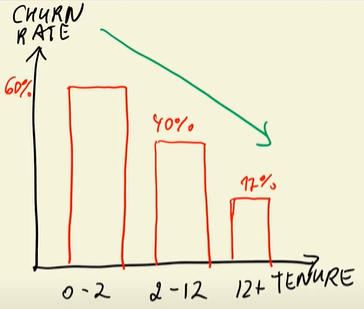

### Monthly charges

In [ ]:
# Churn rate for cutomers with monthly charges less than $20
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

0.08795411089866156

In [ ]:
# Churn rate for cutomers with monthly charges betweem $20 and $50
df_full_train[(df_full_train.monthlycharges>20)&(df_full_train.monthlycharges<=50)].churn.mean()

0.18340943683409436

In [ ]:
# Churn rate for cutomers with monthly charges more than $50
df_full_train[df_full_train.monthlycharges>50].churn.mean()

0.32499341585462205

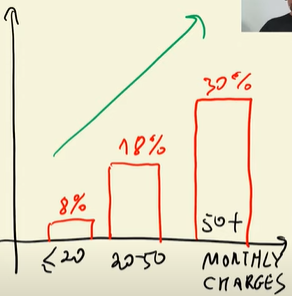

# 9. One-hot encoding

Use Scikit-Learn to encode categorical features.

Converting a categorical variable into a bunch of binary variables.

Hot means value that is activated (1s) and is encoded as 1

**Steps:**
1. Turn df into dictionary
2. Fit `DictVictorizer()` by passing to it the dictionaries
3. See what are the feature names by `dv.get_feature_names()`, which based on that it creates the feature matrix
4. Use `dv.transform(dicts)` to get the encoded matrix

`DictVictorizer()` is smart enough to recognize numerical variables, and it leaves it as it is.

## Turn records into dictionary and fit to DictVectorizer()

In [ ]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')

In [ ]:
# Create a new instance of DictVectorizer

# Set sparse to false so it won't generate spicy.sparse matrix
# (way of encoding data when there are a lot of 0s)
# A compressed sparse row format
# A sparse matrix consists of mostly 0s 
dv = DictVectorizer(sparse=False)

In [ ]:
# We can fit and transform at the same time
# same as doing:
# dv.fit(train_dicts)
# X_train = dv.transform(train_dicts)
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train.shape

(4225, 45)

In [ ]:
# Feature names
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

### Validation data

*Note: We don't fit on validation dataset*

In [ ]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

# 10. Logistic Regression
- Binary Classification
- Linear vs Logistic Regression

Logstic Regression deals with **binary classification**. 

- Target values can only be 0s and 1s. 
  - 1s: Positive (churn)
  - 0s: Negative (no churn)


---

g(xi) = yi

- g -> model
- yi -> target

Depending on the type of y, we have different types of supervised machine learning:
- Regression
- Classification
  - Binary (this is the problem that logistic regression is solving)
  - Multiclass
  - ...



---



**Binary Classification**

Target values can only be:
- 0s (negative, No Churn)
- 1s (positive, Churn) 

g(xi) -> 0-1 (probability of xi belonging to the positive class)

## Sigmoid

We use this function to convert a score to a probability.

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [ ]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

We can see that the numbers are now ranging from 0 to 1.

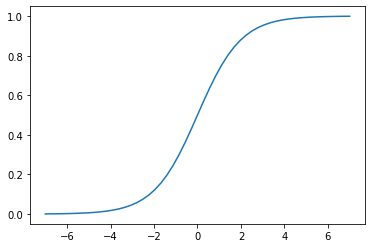

In [ ]:
plt.plot(z, sigmoid(z));

This is how the Sigmoid function looks like.

In [ ]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j]*w[j]

  result = sigmoid(score)
  return result

It is very similar to linear regression, except that we have scores and we apply sigmoid function to it.

Both linear and logistic regression are linear models. The reason they are called linear is because we they use the dot product (which is called linear operator in linear algebra).

Linear models pros:
- Fast to use and train


# 11. Training Logistic Regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

## Train

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.intercept_[0]

-0.10903461122930498

This is the bias term. Here, it is called intercept.

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

These are the weights

## Predict

In [ ]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

What we are interested in is not predictions.

These are called **Hard Predictions**, because we have the exact label (0 or 1). We do not know the certainty/probability of these predictions.

We want to apply our own threshold to decide if someone will churn or not if they exceed a certain probability.

In [ ]:
# To find the probability (soft predictions)
model.predict_proba(X_val)

array([[0.99100402, 0.00899598],
       [0.79547762, 0.20452238],
       [0.78777755, 0.21222245],
       ...,
       [0.86361572, 0.13638428],
       [0.20023047, 0.79976953],
       [0.16259264, 0.83740736]])

The left column is the **probablity of not churning**, and the right column is the **probability of churning**. We are interested in the latter.


In [ ]:
# Probabilities of churning
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
# If probability is higher than 0.5, it means the customer will churn
churn_decision = (y_pred >= 0.5)

## Accuracy
See how accurate the model is predicting.

In [ ]:
y_val, churn_decision.astype(int)

(array([0, 0, 0, ..., 0, 1, 1]), array([0, 0, 0, ..., 0, 1, 1]))

In [ ]:
(y_val == churn_decision).mean()

0.8034066713981547

80% of predictions match the actual value.

The model is 80% accurate.


# 12. Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

## Look at the coefficients

In [ ]:
# Name of the features
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [ ]:
# Feature weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [ ]:
# See what is the weight for each feature
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

## Train a smaller model with fewer features

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
# Intercept (bias term)
w0 = model_small.intercept_[0]
w0

-2.476775663985754

In [ ]:
# Weights
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [ ]:
# See what is the weight for each feature
dict(zip(dv_small.get_feature_names(), w.round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

    -0.247 + 0.97 + (-0.025) + (-0.949)

           + 0.027

           + (-0.036)



---




### Small example

If we have a customer that has monthly contract, pays $50 per month, and has been with the company for 5 months:

    -0.247 + (1 ⋅ 0.97) + (0 ⋅ (-0.025)) + (0 ⋅ (-0.949))

           + (50 ⋅ 0.027)

           + (5 ⋅ (-0.036))

In [ ]:
sigmoid(w0)

0.07750241477659009

By default we assume that the probability of someone leaving the company is small.

As the score of w0 gives a 7% probability of leaving.

In [ ]:
# Add monthly contract
sigmoid(w0 + 0.97)

0.18141713125721085

When we learn that the customer has a monthly contract, the probability for churning for this customer got bigger.

In [ ]:
# Add $50 monthly charges
sigmoid(w0 + 0.97 + 50*0.027)

0.46088616484253503

When we learn that the customer has to pay $50, the probability increased to 46%

In [ ]:
# Add 5 months tenure
sigmoid(w0 + 0.97 + 50*0.027 + 5*(-0.036))

0.4165929188253326

Finally, when we learn that the customer spent 5 months with us, the probability of churning decreased a little bit.

# 13. Using The Model

## Train

In [ ]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

## Test

In [ ]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [ ]:
# We don't fit in the test sets, transform only
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
# Probability higher than 0.5 will churn
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test).mean()

0.815471965933286

### Let's test on a customer

In [ ]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
X_small = dv.transform(customer)

In [ ]:
X_small.shape

(1, 45)

In [ ]:
model.predict_proba(X_small)[0,1]

0.4056810977859304

Model predicts that the customer is not going to churn.

In [ ]:
y_test[10]

0

We can see here that the actual value is 0 too, meaning the model predicted correctly.

# 14. Summary
- Feature importance: risk, mutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression - linear model like linear regression
- Outpot of log reg - probability
- Interpretation of weights is similar to linear regression


15. Explore More

More things

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
